In [1]:
custom_data_home = 'datasets'
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home=custom_data_home)

In [2]:
X = mnist.data[::50,:] # fill X variable table with 1/50 entries
Y = mnist.target[::50] # fill y results table with 1/50

print(X.shape) # nb echantillon , value on black (0 to 255) on 784 pixel (28*28)
print(Y.shape)

(1400, 784)
(1400,)


In [3]:
print(X)
print(Y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. ... 9. 9. 9.]


Populating the interactive namespace from numpy and matplotlib


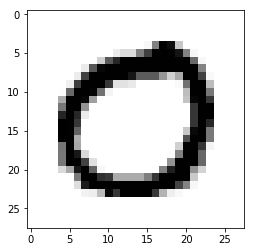

In [4]:
%pylab inline
# EXEMPLE of plotting 1 sample 
sample_idx = 42
sample_image = np.reshape(X[sample_idx, :], (28, 28)) # reshape into 28x28 table coordinate in table = coord in image
plt.imshow(sample_image, cmap='binary') # print table into image with value presented as pixel 

In [8]:
# EXERCICE 1 : cluster data into 10 sets
from sklearn import cluster, metrics # metrics to measure shapes and clustering description
cls = cluster.KMeans(n_clusters = 10)
cls.fit(X) #compute clustering
# silhouette coef on normalize data, according to clusters labels
silh_measure = metrics.silhouette_score(X, cls.labels_)
print(silh_measure)

0.06608442819454328


In [ ]:
# EXERCICE 2 : projecting data in 2 dimensionnal plot (using principal components)
# SCALING variables
from sklearn import preprocessing
#X_norm = preprocessing.scale(X)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [9]:
# COMPONENT REDUCTION
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox
tsne = manifold.TSNE(n_components=2,init='pca')
X_tsne = tsne.fit_transform(X_scaled)

print(X_tsne)
print(X_tsne.shape)

[[ 46.94207   -14.42968  ]
 [ 52.454643  -19.488413 ]
 [ 59.72812    -5.4032106]
 ...
 [-34.35811    35.60077  ]
 [-38.754585   19.951866 ]
 [-54.56824     4.3664722]]
(1400, 2)


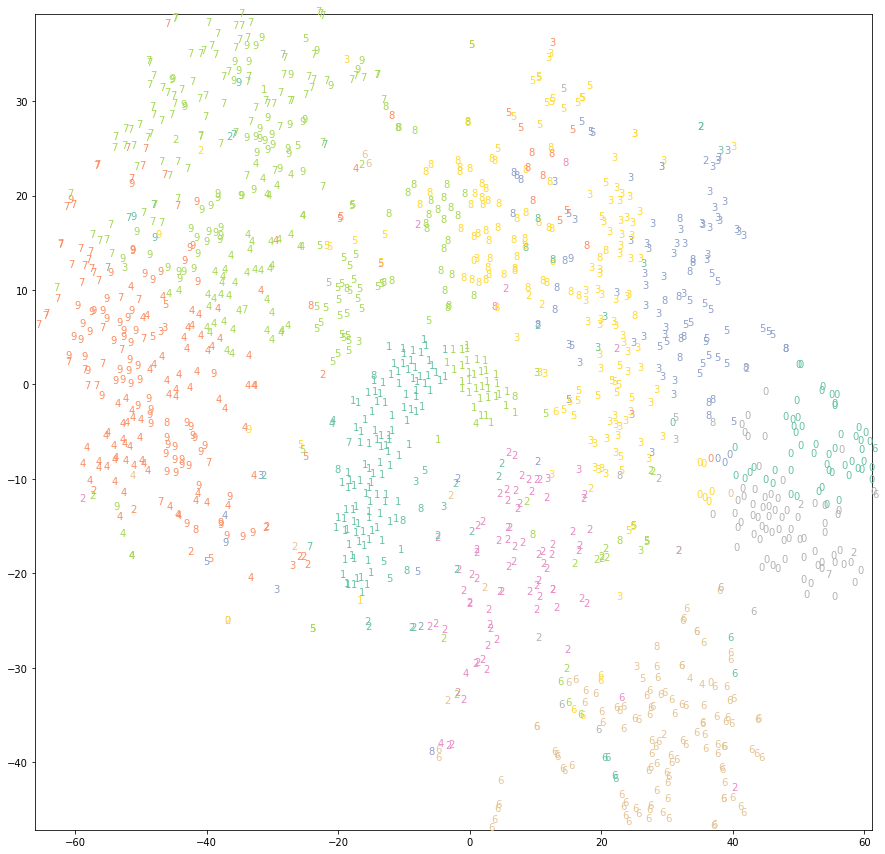

In [13]:
# PLOT BUILDING
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)

# point by point
for i in range(X.shape[0]):
    plt.text(X_tsne[i,0], X_tsne[i,1], 
            str('%d' % Y[i]),  # le point i est représenté par son chiffre in Y
            color=plt.cm.Set2(cls.labels_[i]/10.)
            )
    
# Axis definition from Min/MAX of data
plt.xlim([np.min(X_tsne[:, 0]), np.max(X_tsne[:, 0])])
plt.ylim([np.min(X_tsne[:, 1]), np.max(X_tsne[:, 1])])    
    
plt.show()

In [16]:
# 3. Évaluation
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, cls.labels_))

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(Y, cls.labels_))

Silhouette Coefficient: 0.066
Adjusted Rand Index: 0.333
